<a href="https://colab.research.google.com/github/phuclhp1922/VGU-AI_Lab-Dr.Cuong/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Allow Google Drive access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Read dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Basic/AI VIET NAM/Softmax Regression/Twitter_Data.csv"
df = pd.read_csv(dataset_path)

In [ ]:
# Check the shape of the dataset
df.shape

(162980, 2)

In [ ]:
# Drop empty entries
df = df.dropna()

In [ ]:
# Remove uesless stuff
def text_normalize(text):
  text = re.sub(r'^rt [\s]+', '', text)
  text = re.sub(r'https ?:\/\/.*[\ r\n]*', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'[^\w\s]', '', text)

  stop_words = set(stopwords.words('english'))
  words = text.split()
  words = [word for word in words if word not in stop_words]
  text = ' '.join(words)

  stemmer = SnowballStemmer('english')
  words = text.split()
  words = [stemmer.stem(word) for word in words]
  text = ' '.join(words)

  return text

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

In [ ]:
# Add bias
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [ ]:
# One-hot encoding
n_classes = df['category'].nunique()
n_samples = df['category'].size

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [ ]:
# Divide train, test, and val set
val_size = 0.2
test_size = 0.125
random_state = 2

X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded, test_size=val_size, random_state=random_state, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=True)

In [ ]:
# Define commonly used function
def softmax(z):
  exp_z = np.exp(z)

  return exp_z / exp_z.sum(axis=1)[:, None]

def predict(X, theta):
  z = np.dot(X, theta)
  y_hat = softmax(z)
  return y_hat

def compute_loss(y_hat, y):
  n = y.size

  return (-1 / n) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
  return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
  return theta - lr * gradient

def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta)
  acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()

  return acc

In [ ]:
# Hyper-parameter
lr = 0.01
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

In [ ]:
# Train model
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_accs = []
  train_batch_losses = []
  val_batch_accs = []
  val_batch_losses = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    train_loss = compute_loss(y_hat, y_i)
    train_batch_losses.append(train_loss)

    gradient = compute_gradient(X_i, y_i, y_hat)
    theta = update_theta(theta, gradient, lr)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(train_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses)/ len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print (f'\ nEPOCH { epoch + 1}:\ Training loss : { train_batch_loss :.3f}\tValidation loss : { val_batch_loss :.3f}')

\ nEPOCH 1:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 2:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 3:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 4:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 5:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 6:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 7:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 8:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 9:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 10:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 11:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 12:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 13:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 14:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 15:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 16:\ Training loss : 0.377	Validation loss : 0.377
\ nEPOCH 17:\ Training loss : 0.377	Validation lo

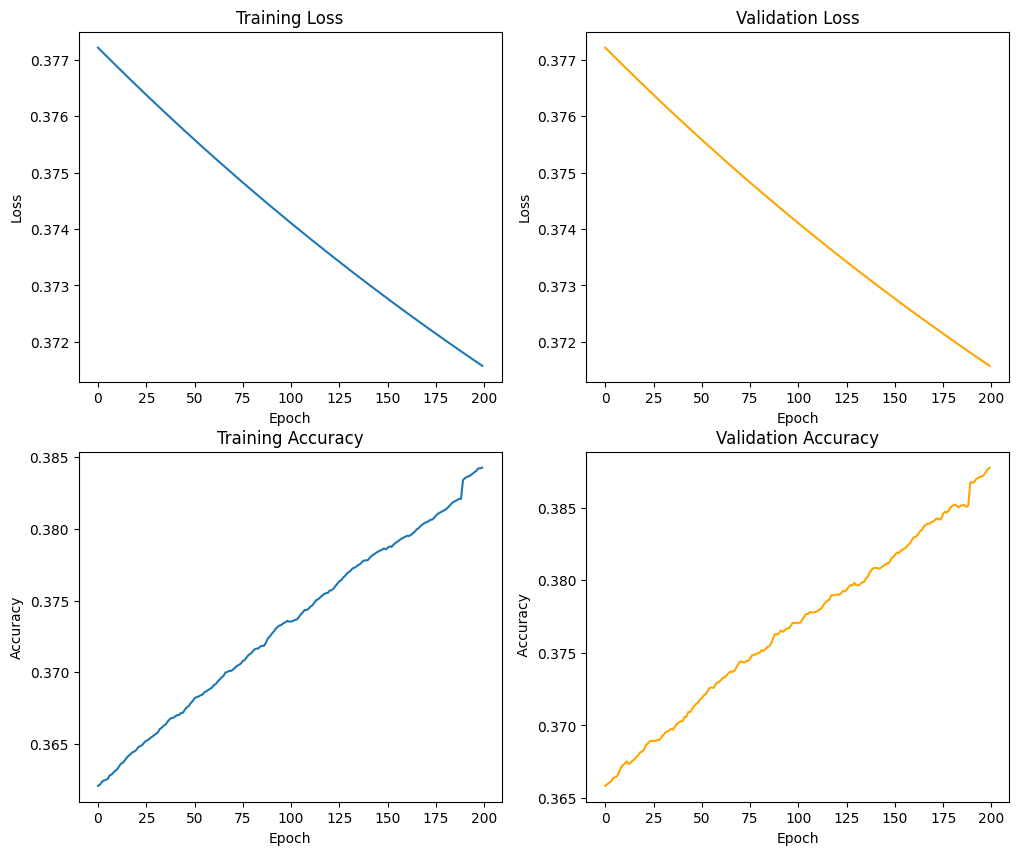

In [ ]:
# Plot train + val loss and accuracy
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel=' Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy : { val_set_acc }')
print(f'Accuracy : { test_set_acc }')

Evaluation on validation and test set:
Accuracy : 0.3877707553537461
Accuracy : 0.38504019144627843
